# Week-1

# Linear Regression Example using tensorflow
Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


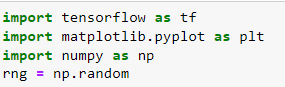

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng = np.random

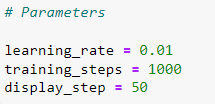

In [2]:
# Set the learning rate for the model
learning_rate = 0.01
training_steps = 1000
display_step = 50

#### Just run the next cell using 'Ctrl' + 'Enter'

In [3]:
# Training Data
X = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
              7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
Y = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
              2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = X.shape[0]

In [4]:
print(X, '\n', X.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


In [5]:
print(Y, '\n', Y.shape)

[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ] 
 (17,)


[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ] 
 (17,)


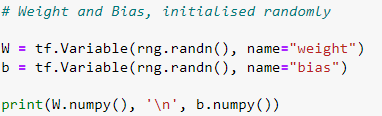

In [6]:
# Initialize weight and bias
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

print(W.numpy(), '\n', b.numpy())

1.0055717 
 -0.76633793


-0.6282028 
 1.6282653


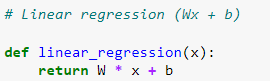

In [7]:
# Define linear regression model
def linear_regression(x):
    return W * x + b

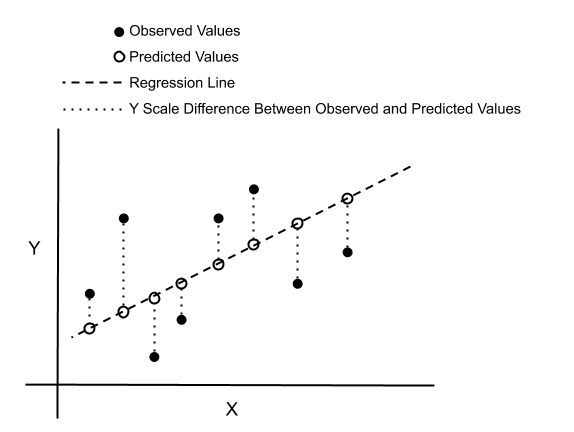

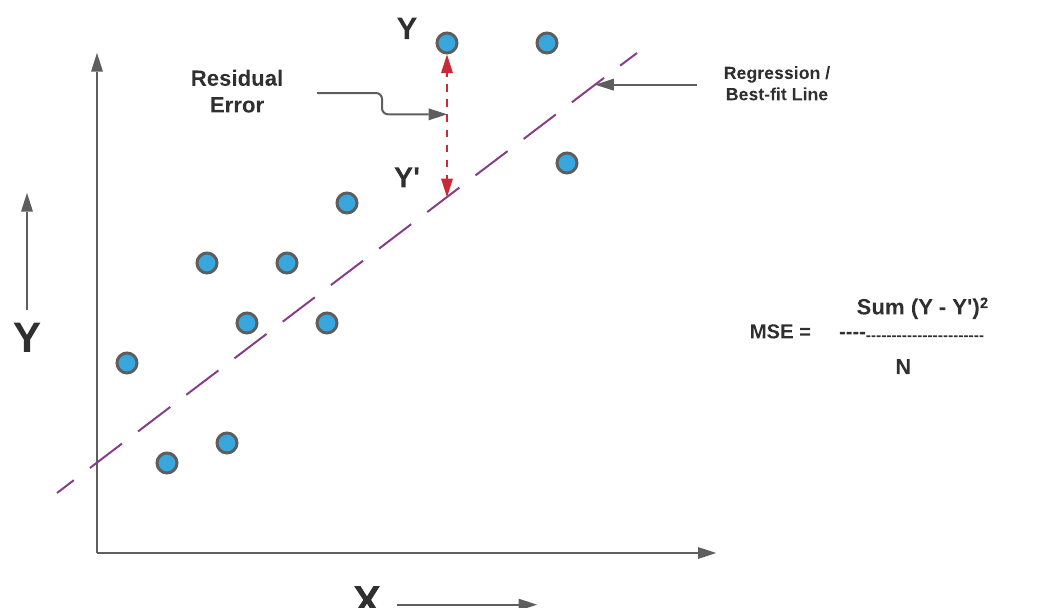

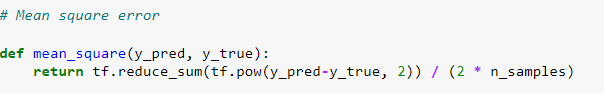

In [8]:
# Define mean square error loss
# Define a function called mean_square that takes two arguments, y_pred and y_true
def mean_square(y_pred, y_true):
    #Calculate the mean of the squared difference between y_pred and y_true
    return tf.reduce_mean(tf.square(y_pred - y_true)) / 2

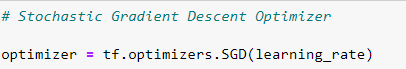

In [9]:
# Stochastic Gradient Descent optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
# Adding a question mark () after the function name lets you view the latest documentation. 
# This is a handy tool.

In [17]:
tf.optimizers.SGD?

Init signature:
tf.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD',
    **kwargs,
)
Docstring:     
Gradient descent (with momentum) optimizer.

Update rule for parameter `w` with gradient `g` when `momentum` is 0:

```python
w = w - learning_rate * g
```

Update rule when `momentum` is larger than 0:

```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```

When `nesterov=True`, this rule becomes:

```python
velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g
```

Args:
    learning_rate: A float, a
        `keras.optimizers.schedules.LearningRateSchedule` instance, or
        a callable that takes no arguments and returns the actual value to


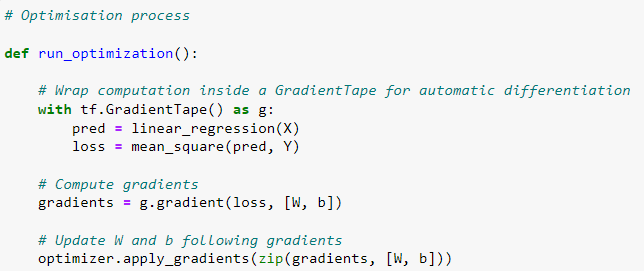

In [10]:
# Optimization process
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

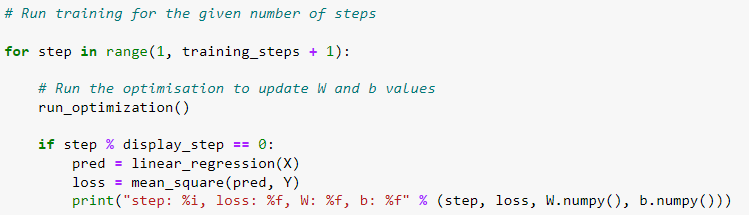

In [11]:
# Training loop
for step in range(1, training_steps + 1):
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print(f"Step: {step}, Loss: {loss:.4f}, W: {W.numpy():.4f}, b: {b.numpy():.4f}")

Step: 50, Loss: 0.2242, W: 0.4692, b: -0.7435
Step: 100, Loss: 0.2073, W: 0.4564, b: -0.6526
Step: 150, Loss: 0.1924, W: 0.4443, b: -0.5671
Step: 200, Loss: 0.1792, W: 0.4329, b: -0.4866
Step: 250, Loss: 0.1675, W: 0.4223, b: -0.4109
Step: 300, Loss: 0.1571, W: 0.4122, b: -0.3396
Step: 350, Loss: 0.1480, W: 0.4028, b: -0.2725
Step: 400, Loss: 0.1398, W: 0.3938, b: -0.2094
Step: 450, Loss: 0.1327, W: 0.3855, b: -0.1500
Step: 500, Loss: 0.1263, W: 0.3776, b: -0.0941
Step: 550, Loss: 0.1206, W: 0.3702, b: -0.0415
Step: 600, Loss: 0.1156, W: 0.3632, b: 0.0080
Step: 650, Loss: 0.1112, W: 0.3566, b: 0.0546
Step: 700, Loss: 0.1073, W: 0.3504, b: 0.0985
Step: 750, Loss: 0.1038, W: 0.3446, b: 0.1397
Step: 800, Loss: 0.1007, W: 0.3391, b: 0.1786
Step: 850, Loss: 0.0980, W: 0.3340, b: 0.2151
Step: 900, Loss: 0.0956, W: 0.3291, b: 0.2495
Step: 950, Loss: 0.0935, W: 0.3246, b: 0.2819
Step: 1000, Loss: 0.0916, W: 0.3203, b: 0.3123


step: 50, loss: 0.124850, W: 0.127526, b: 1.678677
step: 100, loss: 0.119369, W: 0.134839, b: 1.626834
step: 150, loss: 0.114515, W: 0.141720, b: 1.578046
step: 200, loss: 0.110216, W: 0.148197, b: 1.532132
step: 250, loss: 0.106409, W: 0.154291, b: 1.488923
step: 300, loss: 0.103038, W: 0.160027, b: 1.448260
step: 350, loss: 0.100052, W: 0.165425, b: 1.409994
step: 400, loss: 0.097407, W: 0.170504, b: 1.373981
step: 450, loss: 0.095065, W: 0.175285, b: 1.340091
step: 500, loss: 0.092991, W: 0.179783, b: 1.308198
step: 550, loss: 0.091154, W: 0.184017, b: 1.278184
step: 600, loss: 0.089527, W: 0.188001, b: 1.249938
step: 650, loss: 0.088086, W: 0.191750, b: 1.223357
step: 700, loss: 0.086810, W: 0.195279, b: 1.198342
step: 750, loss: 0.085680, W: 0.198599, b: 1.174800
step: 800, loss: 0.084679, W: 0.201724, b: 1.152646
step: 850, loss: 0.083793, W: 0.204665, b: 1.131797
step: 900, loss: 0.083008, W: 0.207432, b: 1.112177
step: 950, loss: 0.082312, W: 0.210037, b: 1.093712
step: 1000, l

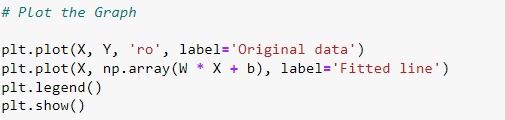

In [1]:
# plt.plot(X, Y, 'ro', label = 'Original data')
# plt.plot(X, np.array(W*X+b), label='Fitted line')
# plt.legend()
# plt.show()

In [2]:
# # Visualization
# plt.figure(figsize=(10, 6))  # Adjusted figure size
# plt.scatter(X, Y, color='darkorange', marker='o', label='Original Data')  # Customized data points
# plt.plot(X, np.array(W * X + b), color='blue', linewidth=3, label='Fitted Line')  # Enhanced fitted line
# plt.title("Linear Regression with TensorFlow", fontsize=16)
# plt.xlabel("X-axis", fontsize=12)
# plt.ylabel("Y-axis", fontsize=12)
# plt.legend(fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)  # Added a grid for better readability
# plt.show()

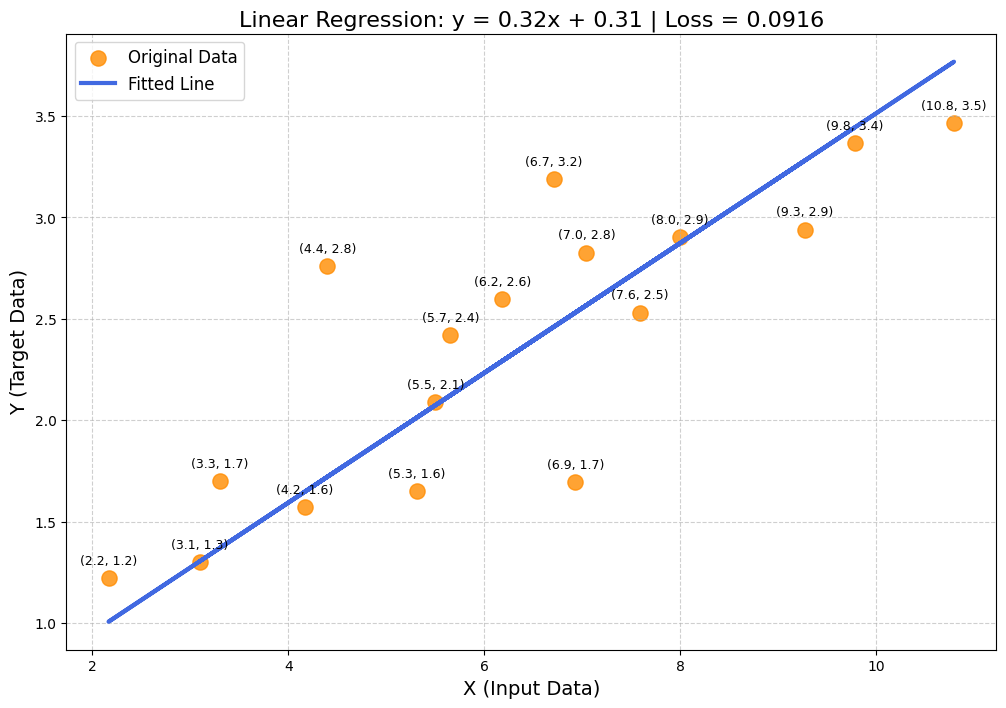

In [13]:
# Visualization with enhanced details
plt.figure(figsize=(12, 8))  # Adjusted figure size for clarity

# Scatter plot for the original data
plt.scatter(X, Y, color='darkorange', marker='o', s=120, alpha=0.8, label='Original Data')  # Larger markers with transparency

# Plot the fitted line
plt.plot(X, np.array(W * X + b), color='royalblue', linewidth=3, label='Fitted Line')  # Thicker line for better visibility

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adding annotations
for i in range(len(X)):
    plt.annotate(f"({X[i]:.1f}, {Y[i]:.1f})", (X[i], Y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9)

# Displaying final W, b, and Loss in the graph title
final_loss = mean_square(linear_regression(X), Y).numpy()
plt.title(f"Linear Regression: y = {W.numpy():.2f}x + {b.numpy():.2f} | Loss = {final_loss:.4f}", fontsize=16)

# Adding axis labels
plt.xlabel("X (Input Data)", fontsize=14)
plt.ylabel("Y (Target Data)", fontsize=14)

# Legend for clarity
plt.legend(fontsize=12)

# Show the graph
plt.show()

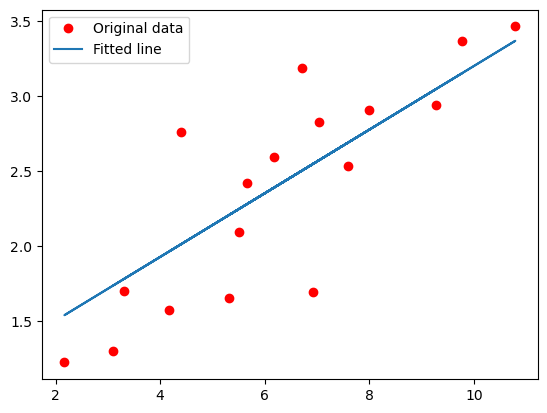

# Lab Logbook requirements: 
### Please make sure to document the following in your Lablogbook:

Include an image of the generated graph depicting the original data and the fitted line for linear regression. Modify the appearance of the graph by adjusting its color or size. Copy the figure and paste it directly into your logbook. Refrain from taking a snapshot; instead, right-click and copy the graph to your lab logbook. Ensure that no code or other information is added to the logbook and that only required graph is present.  

#### Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.